# monday class

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds=pd.read_excel("Churn_Modelling.csv.xlsx")

In [3]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [4]:
print("no of columns:",len(ds.columns))
print(ds.columns)

no of columns: 14
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


# split dataset into x and y

In [5]:
x=pd.DataFrame(ds.iloc[:,3:13].values)
y=ds.iloc[:,13].values

# Encoding categorical Data

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x_2=LabelEncoder()
x.loc[:,2]=labelencoder_x_2.fit_transform(x.iloc[:, 2])

In [7]:
type(x)

pandas.core.frame.DataFrame

# onehotencoding

In [8]:
labelencoder_x_1=LabelEncoder()
x.loc[:, 1]=labelencoder_x_1.fit_transform(x.iloc[:,1])

In [9]:
x

,0,1,2,3,4,5,6,7,8,9
0,619.0,0,0,42.0,2.0,0.0,1.0,1.0,1.0,101348.88
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0,0,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57
3,699.0,0,0,39.0,1.0,0.0,2.0,0.0,0.0,93826.63
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39.0,5.0,0.0,2.0,1.0,0.0,96270.64
9996,516.0,0,1,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0,0,36.0,7.0,0.0,1.0,0.0,1.0,42085.58
9998,772.0,1,1,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [10]:
onehotencoder=OneHotEncoder()
labelencoder_x_1=LabelEncoder()
x.loc[:, 1]=labelencoder_x_1.fit_transform(x.iloc[:,1])
x=onehotencoder.fit_transform(x).toarray()
x=x[:,1:]

In [11]:
x.shape

(10000, 16934)

# split the x and y dataset into the traning set and test set

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape

(8000, 16934)

In [14]:
#perform feature scaling
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
x_train

array([[-0.01118104, -0.01118104, -0.01118104, ..., -0.01118104,
        -0.01118104, -0.01118104],
       [-0.01118104, -0.01118104, -0.01118104, ..., -0.01118104,
        -0.01118104, -0.01118104],
       [-0.01118104, -0.01118104, -0.01118104, ..., -0.01118104,
        -0.01118104, -0.01118104],
       ...,
       [-0.01118104, -0.01118104, -0.01118104, ..., -0.01118104,
        -0.01118104, -0.01118104],
       [-0.01118104, -0.01118104, -0.01118104, ..., -0.01118104,
        -0.01118104, -0.01118104],
       [-0.01118104, -0.01118104, -0.01118104, ..., -0.01118104,
        -0.01118104, -0.01118104]])

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
classifier=Sequential()

In [18]:
classifier.add(Dense(units=32,activation="relu",input_dim=16934))

In [19]:
seed=3
#add  the input layer and the first hidden layer
initializer=keras.initializers.RandomNormal(mean=0,stddev=1.)

In [20]:
classifier.add(Dense(units=32,kernel_initializer=initializer ,activation='relu',input_dim=16934))

In [21]:
#Add the second hidden layer
classifier.add(Dense(units=32,kernel_initializer=initializer,activation='relu')) # units are neurons

In [22]:
# add the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
import tensorflow as tf
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,
                                                       decay_steps=10000,
                                                       decay_rate=0.9)
optimizer=keras.optimizers.SGD(learning_rate=lr_schedule)

# Train ANN.
#compile the ANN.

In [24]:

classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=classifier.fit(x_train,y_train ,validation_split=0.2,batch_size=10,epochs=5,verbose=1 )
print(history.history.keys())

Epoch 1/5
640/640 [==============================] - 5s 8ms/step - loss: 0.0400 - accuracy: 0.9727 - val_loss: 0.1027 - val_accuracy: 0.9581
Epoch 2/5
640/640 [==============================] - 5s 7ms/step - loss: 0.0398 - accuracy: 0.9727 - val_loss: 0.1038 - val_accuracy: 0.9594
Epoch 3/5
640/640 [==============================] - 5s 7ms/step - loss: 0.0395 - accuracy: 0.9727 - val_loss: 0.1109 - val_accuracy: 0.9600
Epoch 4/5
640/640 [==============================] - 5s 7ms/step - loss: 0.0392 - accuracy: 0.9727 - val_loss: 0.1140 - val_accuracy: 0.9600
Epoch 5/5
640/640 [==============================] - 5s 7ms/step - loss: 0.0381 - accuracy: 0.9730 - val_loss: 0.1163 - val_accuracy: 0.9600
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
classifier.evaluate(x_test,y_test)

63/63 [==============================] - 1s 5ms/step - loss: 0.5275 - accuracy: 0.8125


[0.527538001537323, 0.8125]

In [27]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 1s 5ms/step


In [28]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# make the confusion matrix

In [29]:


from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1558   37]
 [ 338   67]]


0.8125

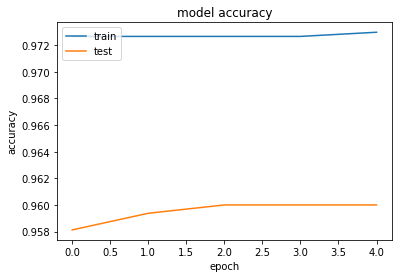

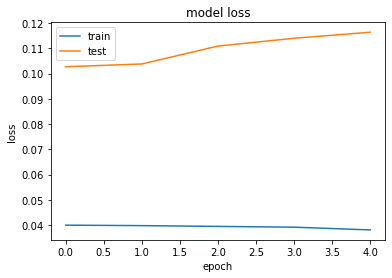

In [34]:
#summarize history for accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
